In [4]:
from actorcritic import ActorCriticAgent, EnvironmentWrapper
import gymnasium as gym
import numpy as np

In [5]:
# Configurable hyperparameters
config = {
    'experiment': 'Acrobot',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 5, 
    'hidden_sizes': [64, 128, 64], 
    'lr_actor': 0.001,
    'lr_critic': 0.005,
    'verbosity': 10,
    'env_name': 'Acrobot-v1',
    'gamma': 0.99, # Discount factor
    'reward_threshold': -85.0,
    'max_episodes': 1000,
    'max_steps': 200,
    'update_frequency': 100

}

In [6]:
# create a child class for acrobot with a updates reward
class AcrobotWrapper(EnvironmentWrapper):
    def step(self, action):
        action = min(self.action_space-1, max(0, action))

        state, reward, done, _, info = self.env.step(action)

        # Extract the two angles from the state
        cos_theta1, sin_theta1, cos_theta2, sin_theta2, _, _ = state
        # Convert cos and sin of theta1 and theta2 into their angles
        theta1 = np.arctan2(sin_theta1, cos_theta1)
        theta2 = np.arctan2(sin_theta2, cos_theta2)
        # Calculate the vertical position of the free end
        vertical_position = -np.cos(theta1) - np.cos(theta2 + theta1)
        # Define a custom reward based on the vertical position
        reward += vertical_position  # Reward based on vertical position and step
        # Pad state to match target_state_size
        padded_state = np.append(state, np.zeros(self.target_state_size - len(state)))
        return padded_state, reward, done, info

In [7]:
# Initialize the environment
env = gym.make(config['env_name'])
env_wrapper = AcrobotWrapper(env)
# env_wrapper = AcrobotWrapper(env)

# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)

2024-03-10 20:09:38.131426: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 20:09:38.197985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 20:09:38.198020: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 20:09:38.199546: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 20:09:38.210652: I tensorflow/core/platform/cpu_feature_guar

In [8]:
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])

Episode 0, Avg Reward: -554.6428229808807, PLoss: -320.0621032714844, VLoss: 838.5231323242188
Episode 10, Avg Reward: -572.6833848465573, PLoss: -323.5783386230469, VLoss: 875.7555541992188
Episode 20, Avg Reward: -570.7542734713782, PLoss: -259.1980895996094, VLoss: 4915.76171875
Episode 30, Avg Reward: -574.2460992913092, PLoss: 56.68042755126953, VLoss: 19698.3984375
Episode 40, Avg Reward: -577.0052165025618, PLoss: -12.28831672668457, VLoss: 6476.689453125
Episode 50, Avg Reward: -577.6970231252558, PLoss: -266.2978515625, VLoss: 35122.27734375
Episode 60, Avg Reward: -579.0026223737685, PLoss: -231.81607055664062, VLoss: 5224.724609375
Episode 70, Avg Reward: -580.7400704756589, PLoss: 45.69192123413086, VLoss: 2151.80419921875
Episode 80, Avg Reward: -582.0706364490368, PLoss: 346.69537353515625, VLoss: 18991.328125
Episode 90, Avg Reward: -582.5145738085548, PLoss: 88.4326400756836, VLoss: 34066.9765625
Episode 100, Avg Reward: -581.4135573780536, PLoss: -118.7232666015625, VL

In [9]:
# remove the handicap
class AcrobotWrapper(EnvironmentWrapper):
    def step(self, action):
        action = min(self.action_space-1, max(0, action))

        state, reward, done, _, info = self.env.step(action)
        padded_state = np.append(state, np.zeros(self.target_state_size - len(state)))
        return padded_state, reward, done, info

env_wrapper = AcrobotWrapper(env)

In [10]:
results2 = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])

Episode 0, Avg Reward: -100.0, PLoss: -14.9196138381958, VLoss: 5997.94873046875
Episode 10, Avg Reward: -90.9090909090909, PLoss: 13.722965240478516, VLoss: 5946.6669921875
Episode 20, Avg Reward: -86.57142857142857, PLoss: -16.932680130004883, VLoss: 2238.837890625
Episode 30, Avg Reward: -86.06451612903226, PLoss: -7.986064910888672, VLoss: 1323.5567626953125
Episode 40, Avg Reward: -87.92682926829268, PLoss: -11.36963176727295, VLoss: 780.4052124023438
Episode 50, Avg Reward: -90.03921568627452, PLoss: 0.0030966519843786955, VLoss: 876.979736328125
Episode 60, Avg Reward: -88.9672131147541, PLoss: -7.173496723175049, VLoss: 1536.648681640625
Episode 70, Avg Reward: -88.63380281690141, PLoss: -6.92926549911499, VLoss: 738.9503173828125
Episode 80, Avg Reward: -91.24691358024691, PLoss: 0.3277248740196228, VLoss: 2666.097412109375
Episode 90, Avg Reward: -91.28571428571429, PLoss: -5.21926212310791, VLoss: 743.2986450195312
Episode 100, Avg Reward: -92.46, PLoss: -0.06013419106602669

In [11]:
# save models
agent.save_models()

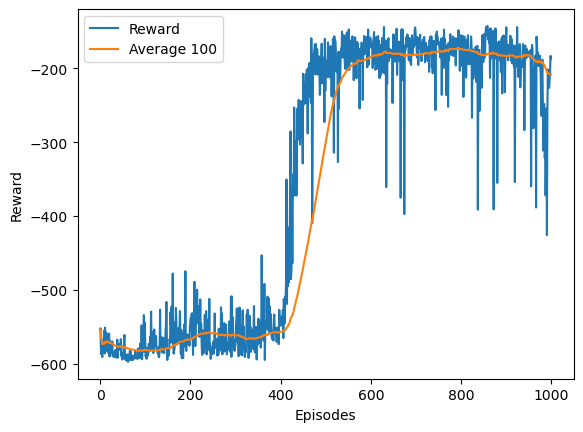

In [12]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [13]:
np.save(f'results/{config["experiment"]}', results)

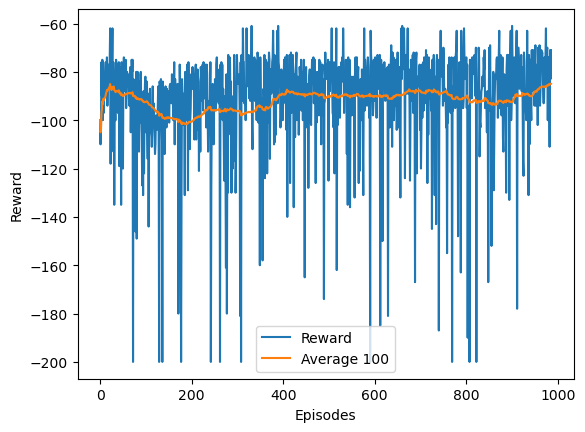

In [14]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results2['Episode'], results2['Reward'], label='Reward')
plt.plot(results2['Episode'], results2['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [15]:
np.save(f'results/{config["experiment"]}_2', results2)